In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [2]:
xlsfile = pd.ExcelFile("Documents/Jessample.xlsx")

In [3]:
dframe = xlsfile.parse("Jessample")

In [4]:
dframe

,Unnamed: 0,date,Salesperson,Total Amount
0,0,2000-01-03,Allen,12000
1,1,2000-01-04,Allen,15000
2,2,2000-01-05,Allen,25000
3,3,2000-01-03,Mathew,3500
4,4,2000-01-04,Mathew,6500
5,5,2000-01-05,Mathew,7500
6,6,2000-01-03,Clarke,6578
7,7,2000-01-04,Clarke,5467
8,8,2000-01-05,Clarke,7790
9,9,2000-01-03,Don,8900


In [17]:
group1 = dframe.groupby("date")

In [18]:
group1

In [22]:
for group in group1:
    for item in group:
        print(item)

2000-01-03 00:00:00
   Unnamed: 0       date Salesperson  Total Amount
0           0 2000-01-03       Allen         12000
3           3 2000-01-03      Mathew          3500
6           6 2000-01-03      Clarke          6578
9           9 2000-01-03         Don          8900
2000-01-04 00:00:00
    Unnamed: 0       date Salesperson  Total Amount
1            1 2000-01-04       Allen         15000
4            4 2000-01-04      Mathew          6500
7            7 2000-01-04      Clarke          5467
10          10 2000-01-04         Don          7000
2000-01-05 00:00:00
    Unnamed: 0       date Salesperson  Total Amount
2            2 2000-01-05       Allen         25000
5            5 2000-01-05      Mathew          7500
8            8 2000-01-05      Clarke          7790
11          11 2000-01-05         Don          6500


In [23]:
group2 = dframe.groupby("Salesperson")

In [27]:
for group in group2:
    for item in group:
        print(type(item))

<class 'str'>
<class 'pandas.core.frame.DataFrame'>
<class 'str'>
<class 'pandas.core.frame.DataFrame'>
<class 'str'>
<class 'pandas.core.frame.DataFrame'>
<class 'str'>
<class 'pandas.core.frame.DataFrame'>


In [37]:
# Exercise

In [28]:
import seaborn as sns
df = sns.load_dataset("flights")
group3 = df.groupby("year")

In [36]:
for group in group3:
    for item in group:
        print(item)

1949
    year      month  passengers
0   1949    January         112
1   1949   February         118
2   1949      March         132
3   1949      April         129
4   1949        May         121
5   1949       June         135
6   1949       July         148
7   1949     August         148
8   1949  September         136
9   1949    October         119
10  1949   November         104
11  1949   December         118
1950
    year      month  passengers
12  1950    January         115
13  1950   February         126
14  1950      March         141
15  1950      April         135
16  1950        May         125
17  1950       June         149
18  1950       July         170
19  1950     August         170
20  1950  September         158
21  1950    October         133
22  1950   November         114
23  1950   December         140
1951
    year      month  passengers
24  1951    January         145
25  1951   February         150
26  1951      March         178
27  1951      April      

In [69]:
for group in group3:
    num_passengers = 0
    for item in group:
        if type(item) != int:
            num_passengers = item["passengers"].sum()
    print(str(group[0]) + ": " + str(num_passengers))

1949: 1520
1950: 1676
1951: 2042
1952: 2364
1953: 2700
1954: 2867
1955: 3408
1956: 3939
1957: 4421
1958: 4572
1959: 5140
1960: 5714


# Aggregation

In [38]:
data = pd.read_csv("Documents/Wine quality.csv")

In [39]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [40]:
data["alcohol"].max()

14.9

In [41]:
wine1 = data.groupby("quality")
wine1

In [42]:
wine1.describe()

fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                10.0  8.360000  1.770875  6.7  7.15  7.50   9.875  11.6   
4                53.0  7.779245  1.626624  4.6  6.80  7.50   8.400  12.5   
5               681.0  8.167254  1.563988  5.0  7.10  7.80   8.900  15.9   
6               638.0  8.347179  1.797849  4.7  7.00  7.90   9.400  14.3   
7               199.0  8.872362  1.992483  4.9  7.40  8.80  10.100  15.6   
8                18.0  8.566667  2.119656  5.0  7.25  8.25  10.225  12.6   

        volatile acidity            ... sulphates       alcohol             \
                   count      mean  ...       75%   max   count       mean   
quality                             ...                                      
3                   10.0  0.884500  ...     0.615  0.86    10.0   9.955000   
4                   53.0  0.693962  ...     0.600  2.00    53.0  10.265094   
5                  681.0  0.577041  ...     0.660  1.98   681.0   9.899706   
6                  638.0  0.497484  ...     0.750  1.95   638.0  10.629519   
7                  199.0  0.403920  ...     0.830  1.36   199.0  11.465913   
8                   18.0  0.423333  ...     0.820  1.10    18.0  12.094444   

                                                      
              std  min     25%     50%     75%   max  
quality                                               
3        0.818009  8.4   9.725   9.925  10.575  11.0  
4        0.934776  9.0   9.600  10.000  11.000  13.1  
5        0.736521  8.5   9.400   9.700  10.200  14.9  
6        1.049639  8.4   9.800  10.500  11.300  14.0  
7        0.961933  9.2  10.800  11.500  12.100  14.0  
8        1.224011  9.8  11.325  12.150  12.875  14.0  

[6 rows x 88 columns]

In [57]:
for group in wine1: # For each quality type
    for item in group:
        if type(item) == int:
            print("Quality: " + str(item)) # Display the quality
        else:
            print(item[["fixed acidity", "volatile acidity", "citric acid"]]) # Display first columns
            print("") # Spacing

Quality: 3
      fixed acidity  volatile acidity  citric acid
459            11.6             0.580         0.66
517            10.4             0.610         0.49
690             7.4             1.185         0.00
832            10.4             0.440         0.42
899             8.3             1.020         0.02
1299            7.6             1.580         0.00
1374            6.8             0.815         0.00
1469            7.3             0.980         0.05
1478            7.1             0.875         0.05
1505            6.7             0.760         0.02

Quality: 4
      fixed acidity  volatile acidity  citric acid
18              7.4             0.590         0.08
38              5.7             1.130         0.09
41              8.8             0.610         0.30
45              4.6             0.520         0.15
73              8.3             0.675         0.26
79              8.3             0.625         0.20
94              5.0             1.020         0.04
151     

In [73]:
for title, group in wine1:
    print("Quality: " + str(title))
    print(group[["fixed acidity", "volatile acidity", "citric acid"]])

Quality: 3
      fixed acidity  volatile acidity  citric acid
459            11.6             0.580         0.66
517            10.4             0.610         0.49
690             7.4             1.185         0.00
832            10.4             0.440         0.42
899             8.3             1.020         0.02
1299            7.6             1.580         0.00
1374            6.8             0.815         0.00
1469            7.3             0.980         0.05
1478            7.1             0.875         0.05
1505            6.7             0.760         0.02
Quality: 4
      fixed acidity  volatile acidity  citric acid
18              7.4             0.590         0.08
38              5.7             1.130         0.09
41              8.8             0.610         0.30
45              4.6             0.520         0.15
73              8.3             0.675         0.26
79              8.3             0.625         0.20
94              5.0             1.020         0.04
151      

In [58]:
# Create own aggregate function

In [59]:
def max_to_min(arr):
    return arr.max() - arr.min()

In [60]:
wine1.agg(max_to_min)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,4.9,1.140,0.66,4.5,0.206,31.0,40.0,0.00609,0.47,0.46,2.6
4,7.9,0.900,1.00,11.6,0.565,38.0,112.0,0.00760,1.16,1.67,4.1
5,10.9,1.150,0.79,14.3,0.572,65.0,149.0,0.01059,0.86,1.61,6.4
6,9.6,0.880,0.78,14.5,0.381,71.0,159.0,0.01362,1.15,1.55,5.6
7,10.7,0.795,0.76,7.7,0.346,51.0,282.0,0.01256,0.86,0.97,4.8
8,7.6,0.590,0.69,5.0,0.042,39.0,76.0,0.00800,0.84,0.47,4.2


In [61]:
# Adding a new calculated column

In [62]:
data["quality/alcohol ratio"] = data["quality"]/ data["alcohol"]

In [63]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality/alcohol ratio
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0.510204
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0.510204
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0.612245
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0.531915


In [64]:
data.pivot_table(index=["quality"])

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,quality/alcohol ratio,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,,
3,9.955000,0.122500,0.171000,0.997464,8.360000,11.000000,3.398000,0.303286,2.635000,0.570000,24.900000,0.884500
4,10.265094,0.090679,0.174151,0.996542,7.779245,12.264151,3.381509,0.392724,2.694340,0.596415,36.245283,0.693962
5,9.899706,0.092736,0.243686,0.997104,8.167254,16.983847,3.304949,0.507573,2.528855,0.620969,56.513950,0.577041
6,10.629519,0.084956,0.273824,0.996615,8.347179,15.711599,3.318072,0.569801,2.477194,0.675329,40.869906,0.497484
7,11.465913,0.076588,0.375176,0.996104,8.872362,14.045226,3.290754,0.614855,2.720603,0.741256,35.020101,0.403920
8,12.094444,0.068444,0.391111,0.995212,8.566667,13.277778,3.267222,0.668146,2.577778,0.767778,33.444444,0.423333


In [65]:
import matplotlib

In [66]:
%matplotlib inline

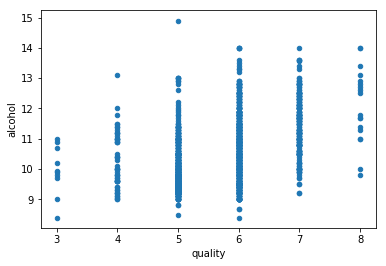

In [67]:
data.plot(kind="scatter", x = "quality", y= "alcohol")

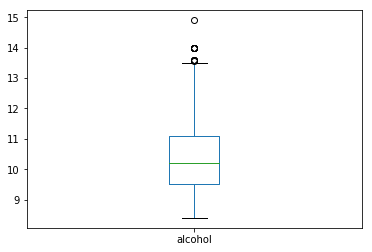

In [68]:
data.plot(kind="box", x="quality", y="alcohol")

# Splitting, Applying and Combining

In [105]:
df = pd.read_csv("Documents/Weather_data.csv")
df

,Day,City,Temperature,Wind speed
0,01/01/2019,New York,32,6
1,02/01/2019,New York,36,7
2,03/01/2019,New York,28,12
3,04/01/2019,New York,33,7
4,01/01/2019,Sydney,90,5
5,02/01/2019,Sydney,85,12
6,03/01/2019,Sydney,87,15
7,04/01/2019,Sydney,92,5
8,01/01/2019,Paris,45,20
9,02/01/2019,Paris,50,13


In [106]:
group = df.groupby("City")
group

In [107]:
for City, City_df in group:
    print(City)
    print(City_df)

New York
          Day      City  Temperature  Wind speed
0  01/01/2019  New York           32           6
1  02/01/2019  New York           36           7
2  03/01/2019  New York           28          12
3  04/01/2019  New York           33           7
Paris
           Day   City  Temperature  Wind speed
8   01/01/2019  Paris           45          20
9   02/01/2019  Paris           50          13
10  03/01/2019  Paris           54           8
11  04/01/2019  Paris           42          10
Sydney
          Day    City  Temperature  Wind speed
4  01/01/2019  Sydney           90           5
5  02/01/2019  Sydney           85          12
6  03/01/2019  Sydney           87          15
7  04/01/2019  Sydney           92           5


In [108]:
# Accessing specific groups

In [109]:
group.get_group("Paris")

,Day,City,Temperature,Wind speed
8,01/01/2019,Paris,45,20
9,02/01/2019,Paris,50,13
10,03/01/2019,Paris,54,8
11,04/01/2019,Paris,42,10


In [110]:
group.max()

,Day,Temperature,Wind speed
City,,,
New York,04/01/2019,36,12
Paris,04/01/2019,54,20
Sydney,04/01/2019,92,15


In [111]:
# finding the average

In [112]:
group.mean()

,Temperature,Wind speed
City,,
New York,32.25,8.00
Paris,47.75,12.75
Sydney,88.50,9.25


City
New York    AxesSubplot(0.125,0.125;0.775x0.755)
Paris       AxesSubplot(0.125,0.125;0.775x0.755)
Sydney      AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

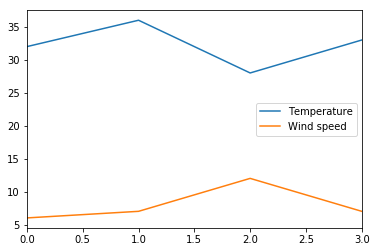

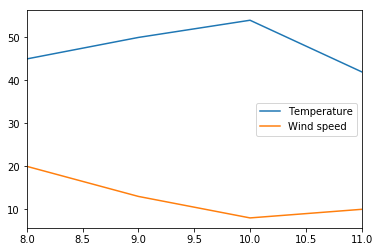

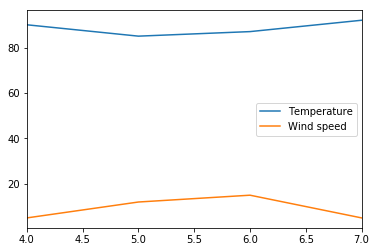

In [113]:
%matplotlib inline
group.plot()

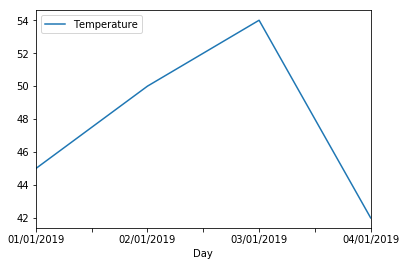

In [120]:
group.get_group("Paris").plot(kind="line", x="Day", y="Temperature")

# Cross tabulation

In [121]:
df = pd.read_csv("Documents/train.csv")

In [122]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [123]:
#applying crosstab

In [124]:
pd.crosstab(df.Survived, df.Pclass)

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [126]:
pd.crosstab(df.Survived, df.Sex)

Sex,female,male
Survived,,
0,81,468
1,233,109


In [129]:
# calculating percentages in the crosstab

In [137]:
pd.crosstab(df.Survived, df.Pclass).apply(lambda r: r/r.sum(), axis=1)

Pclass,1,2,3
Survived,,,
0,0.145719,0.176685,0.677596
1,0.397661,0.254386,0.347953
